# Dependencies

In [1]:
pacman::p_load( dplyr)

# Functions

In [2]:
sampletags_columns <- function(orig_df, grepvars) {
    orig_df$index <- 1:nrow(orig_df) # add index column
    orig_df$sample_tags <- paste0(orig_df$index,",",orig_df$sample_tags) # add index to sample_tags
    splitsampletags <- strsplit(orig_df$sample_tags, split = ",") # split sample_tags by comma into a list
# for each sample_tag, extract the variables in grepvars as list
    mydf <- lapply(splitsampletags, function(sampletag){ 
        y <- unlist(sampletag)
        y <- trimws(y)
        indx <- y[1] # first element is index
        # for each variable in grepvars, extract the value if it exists, if not add NA
        myvars <- lapply(grepvars, function(myvar){
            ifelse(sum(grepl(myvar, y)) == 1, y[grepl(myvar, y)], NA) })
        myvarsdf <- as.data.frame(myvars)
        vardf <- cbind.data.frame(indx, myvarsdf)
        colnames(vardf) <- c("index", grepvars) # rename columns
        return(vardf)
    })
    return(do.call(rbind, mydf)) # return a data frame
}

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [5]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

all metadata

In [6]:
load(file = paste0(datapath,"capTCRseq/meta_div_TRB.RData"))

Warning message in load(file = paste0(datapath, "capTCRseq/meta_div_TRB.RData")):
"strings not representable in native encoding will be translated to UTF-8"


In [7]:
carey <- read.table(file = paste0(h4hpath,"Adaptive/Carey_Preterm2017/SampleOverview_11-23-2022_7-18-00_PM.tsv"), 
sep = "\t", header = T)

In [8]:
henderson <- read.table(file = paste0(h4hpath,"Adaptive/Henderson_MIS2022/SampleOverview_11-23-2022_7-27-08_PM.tsv"), 
sep = "\t", header = T)

In [9]:
mitchell <- read.table(file = paste0(h4hpath,"Adaptive/Mitchell_Michels2022/SampleOverview_11-23-2022_7-25-05_PM.tsv"),
sep = "\t", header = T)

In [10]:
emerson <- read.table(file = paste0(h4hpath,"Adaptive/emerson2017/SampleOverview_01-18-2023_8-18-39_PM.tsv"),
sep = "\t", header = T)

Clean up mitchell metadata

In [11]:
mitchell_1 <- mitchell[ !grepl("Denver",mitchell$sample_name), ]
mitchell_Denver <- mitchell[ grepl("Denver",mitchell$sample_name), ]

In [12]:
rownames(mitchell_Denver) <- 1:nrow(mitchell_Denver)

In [13]:
mitchellvars <- c("Years at visit", "Years at diagnosis", "Male|Female",
                "Subject |Control ", "Timepoint", "Subject")

In [14]:
mitchell_1_tags <- sampletags_columns(mitchell_1, mitchellvars)
mitchell_Denver_tags <- sampletags_columns(mitchell_Denver, c("Years at diagnosis",
"Male|Female", "Type 1 Diabetes"))

In [24]:
head(carey)

,sample_name,total_templates,total_reads,productive_templates,total_productive_reads,fraction_productive,total_rearrangements,productive_rearrangements,productive_simpson_clonality,productive_clonality,...,total_t_cells,fraction_productive_of_cells,sample_cells_mass_estimate,fraction_productive_of_cells_mass_estimate,sample_amount_ng,species,product_subtype,counting_method,sku,test_name
,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>
1,Preterm_23_3,46097,na,33085,na,0.7177,39962,27927,0.0077,0.0115,...,no data,no data,34559,0.957348,224.6400,Human,Survey,v3,NA,NA
2,Preterm_25_5,1738,na,1192,na,0.6858,1718,1177,0.0294,0.0007,...,no data,no data,7975,0.149467,51.8400,Human,Survey,v3,NA,NA
3,Preterm_26_B_2,8668,na,6260,na,0.7222,8373,6022,0.0132,0.0020,...,no data,no data,9452,0.662294,61.4400,Human,Survey,v3,NA,NA
4,Preterm_27_4,23400,na,17021,na,0.7274,22133,15959,0.0084,0.0038,...,no data,no data,14473,1.176052,94.0800,Human,Survey,v3,NA,NA
5,Adult_1_15-04,15728,428862,13067,356304,0.8308,15373,12639,0.0192,0.0321,...,no data,no data,6990,1.869385,45.4400,Human,Survey,v2,NA,NA
6,Adult_2_15-07,13698,265350,11229,217528,0.8198,13595,11037,0.0114,0.0237,...,no data,no data,6252,1.796065,40.6400,Human,Survey,v2,NA,NA


In [16]:
carey_tags <- sampletags_columns(carey, c("Blood",
"Male|Female", "FACS", "Influenza", "Lung", "Years|Adult", "Cord"))

In [17]:
#cleanup emerson tags
emerson$sample_tags <- gsub("35-60 Years", "", emerson$sample_tags)
emerson$sample_tags <- gsub("25-29 Years", "", emerson$sample_tags)
emerson$sample_tags <- gsub("35-39 Years", "", emerson$sample_tags)
emerson$sample_tags <- gsub("45-49 Years", "", emerson$sample_tags)
emerson$sample_tags <- gsub("55-59 Years", "", emerson$sample_tags)
emerson$sample_tags <- gsub("65-69 Years", "", emerson$sample_tags)
emerson$sample_tags <- gsub("45-65 Years", "", emerson$sample_tags)
emerson$sample_tags <- gsub("18-24 Years", "", emerson$sample_tags)
emerson$sample_tags <- gsub("18-35 Years", "", emerson$sample_tags)
emerson$sample_tags <- gsub("15-19 Years", "", emerson$sample_tags)
emerson$sample_tags <- gsub("20-24 Years", "", emerson$sample_tags)
emerson$sample_tags <- gsub("24-45 Years", "", emerson$sample_tags)
emerson$sample_tags <- gsub("12-18 Years", "", emerson$sample_tags)
emerson$sample_tags <- gsub("30-34 Years", "", emerson$sample_tags)
emerson$sample_tags <- gsub("40-44 Years", "", emerson$sample_tags)
emerson$sample_tags <- gsub("50-54 Years", "", emerson$sample_tags)
emerson$sample_tags <- gsub("60-64 Years", "", emerson$sample_tags)
emerson$sample_tags <- gsub("10-14 Years", "", emerson$sample_tags)
emerson$sample_tags <- gsub("00-02 Years", "", emerson$sample_tags) 
emerson$sample_tags <- gsub("01-04 Years", "", emerson$sample_tags)
emerson$sample_tags <- gsub("60+", "", emerson$sample_tags)

In [18]:
emerson_tags <- sampletags_columns(emerson, c("Cohort", 
"Non-Hispanic|Unknown Ethnicity", "Unknown racial|Caucasian|Islander",
 "Inferred CMV", "Years",
"Male|Female", "Cytomegalovirus"))

In [19]:
head(emerson_tags)

,index,Cohort,Non-Hispanic|Unknown Ethnicity,Unknown racial|Caucasian|Islander,Inferred CMV,Years,Male|Female,Cytomegalovirus
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,Cohort 01,Unknown Ethnicity,Unknown racial group,NA,NA,NA,NA
2,2,Cohort 01,Unknown Ethnicity,Unknown racial group,NA,NA,NA,NA
3,3,Cohort 01,Unknown Ethnicity,Unknown racial group,NA,NA,NA,NA
4,4,Cohort 01,Unknown Ethnicity,Unknown racial group,NA,NA,NA,NA
5,5,Cohort 01,Non-Hispanic or Latino,Caucasian,Inferred CMV +,22 Years,Male,Cytomegalovirus +
6,6,Cohort 01,Non-Hispanic or Latino,Caucasian,Inferred CMV +,56 Years,Male,Cytomegalovirus +


In [20]:
henderson_tags <- as.data.frame(henderson$sample_tags)

# some clean up

In [21]:
henderson_tags$study <- "Henderson"
henderson_tags$disease <- henderson_tags$`henderson$sample_tags`
henderson_tags$sample_name <- henderson$sample_name
henderson_tags$Agegroup <- NA
henderson_tags$Sex <- NA

Acronyms for Henderson

MIS-C, multisystem inflammatory syndrome in children; peds, pediatric; COVID-19, coronavirus disease 2019; KD, Kawasaki disease; sJIA, systemic juvenile idiopathic arthritis; MAS, macrophage activation syndrome.

In [22]:
#carey$sample_name[ match(carey_tags$index, rownames(carey)) ]

In [28]:
carey$sample_name[ match(carey_tags$index, rownames(carey)) ]

[1] "Preterm_23_3"    "Preterm_25_5"    "Preterm_26_B_2"  "Preterm_27_4"   
 [5] "Adult_1_15-04"   "Adult_2_15-07"   "Adult_3_15-03"   "Adult_4_15-05"  
 [9] "Adult_5_15-06"   "Cord_1_NWK206"   "Cord_2_NWK211"   "Cord_3_NWK213"  
[13] "Cord_4_NWK231"   "Cord_5_NWK247"   "Infant_1_NWK51"  "Infant_2_NWK134"
[17] "Infant_3_NWK39"  "Infant_4_NWK174" "Infant_5_NWK31"

In [30]:
head(carey_tags)

,index,Blood,Male|Female,FACS,Influenza,Lung,Years|Adult,Cord,study
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,Blood,Male,FACS sorted cells,NA,NA,NA,NA,Carey
2,2,Blood,Female,FACS sorted cells,NA,NA,NA,NA,Carey
3,3,Blood,Male,FACS sorted cells,NA,NA,NA,NA,Carey
4,4,Blood,Female,FACS sorted cells,NA,NA,NA,NA,Carey
5,5,Blood,NA,FACS sorted cells,NA,NA,Adult,NA,Carey
6,6,Blood,NA,FACS sorted cells,Influenza,Lung,Adult,NA,Carey


In [31]:
carey_tags$sample_name <- carey$sample_name[ match(carey_tags$index, rownames(carey)) ]
carey_tags$study <- "Carey"
carey_tags$Agegroup <- gsub("_.*", "", carey_tags$sample_name)
carey_tags$Sex <- carey_tags$`Male|Female`
carey_tags$disease <- "Ctrl"

In [32]:
emerson_tags$study <- "Emerson"
emerson_tags$Agegroup <- emerson_tags$Years
emerson_tags$Sex <- emerson_tags$`Male|Female`
emerson_tags$sample_name <- emerson$sample_name[ match(emerson_tags$index, rownames(emerson)) ]
emerson_tags$disease <- emerson_tags$Cytomegalovirus

In [33]:
mitchell_1_tags$study <- "Mitchell"
mitchell_1_tags$Agegroup <- mitchell_1_tags$`Years at visit`
mitchell_1_tags$Sex <- mitchell_1_tags$`Male|Female`
mitchell_1_tags$sample_name <- mitchell_1$sample_name[ match(mitchell_1_tags$index, rownames(mitchell_1)) ]
mitchell_1_tags$disease[grepl("Control",mitchell_1_tags$`Subject |Control`)] <- "Ctrl"
mitchell_1_tags$disease[grepl("Subject",mitchell_1_tags$`Subject |Control`)] <- "T1D"


In [34]:
head(mitchell_1_tags)

,index,Years at visit,Years at diagnosis,Male|Female,Subject |Control,Timepoint,Subject,study,Agegroup,Sex,sample_name,disease
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,3 Years at visit,NA,Female,Control 006,Timepoint 3,NA,Mitchell,3 Years at visit,Female,310121_TCRB,Ctrl
2,2,3 Years at visit,12.958904109589 Years at diagnosis,Female,Subject 001,Timepoint 1,Subject 001,Mitchell,3 Years at visit,Female,310102_TCRB,T1D
3,3,10 Years at visit,14.4328767123288 Years at diagnosis,Male,Subject 019,Timepoint 3,Subject 019,Mitchell,10 Years at visit,Male,310156_TCRB,T1D
4,4,0 Years at visit,18.0438356164384 Years at diagnosis,Female,Subject 021,Timepoint 1,Subject 021,Mitchell,0 Years at visit,Female,310204_TCRB,T1D
5,5,6 Years at visit,6.37808219178082 Years at diagnosis,Female,Subject 003,Timepoint 4,Subject 003,Mitchell,6 Years at visit,Female,310245_TCRB,T1D
6,6,12 Years at visit,NA,Male,Control 012,Timepoint 4,NA,Mitchell,12 Years at visit,Male,310186_TCRB,Ctrl


In [35]:
mitchell_Denver_tags$study <- "Mitchell_Denver"
mitchell_Denver_tags$Agegroup <- mitchell_Denver_tags$`Years at diagnosis`
mitchell_Denver_tags$Sex <- mitchell_Denver_tags$`Male|Female`
mitchell_Denver_tags$sample_name <- mitchell_Denver$sample_name[ match(mitchell_Denver_tags$index, rownames(mitchell_Denver)) ]
mitchell_Denver_tags$disease <- mitchell_Denver_tags$`Type 1 Diabetes`

## bind all together

In [37]:
# capture subject names. Mitchell dataset is longitudinal, so we need to. For the other datasets, we can just use the sample names
mitchell_1_tags$subject <- mitchell_1_tags$`Subject |Control`

mitchell_Denver_tags$subject <- mitchell_Denver_tags$sample_name
carey_tags$subject <- carey_tags$sample_name
emerson_tags$subject <- emerson_tags$sample_name
henderson_tags$subject <- henderson_tags$sample_name

In [38]:
dfList <- list(carey_tags,henderson_tags,mitchell_1_tags,mitchell_Denver_tags, emerson_tags)
dfColList <- lapply(dfList,colnames)
commonCols <- Reduce(intersect,dfColList)


In [39]:
Reduce(intersect,dfColList)

[1] "study"       "sample_name" "Agegroup"    "Sex"         "disease"    
[6] "subject"

In [40]:
allAdaptive <- rbind(carey_tags[, commonCols], henderson_tags[, commonCols], 
mitchell_1_tags[, commonCols], mitchell_Denver_tags[, commonCols],
 emerson_tags[, commonCols])

In [41]:
# cleanup age groups
allAdaptive$age <- allAdaptive$Agegroup
allAdaptive$age <- gsub("Years at visit", "", allAdaptive$age)
allAdaptive$age <- gsub("Years", "", allAdaptive$age)
allAdaptive$age <- gsub("at diagnosis", "", allAdaptive$age)
allAdaptive$age <- trimws(allAdaptive$age)

# remove age groups
allAdaptive$age[ allAdaptive$age == "Adult" ] <- NA
allAdaptive$age[ allAdaptive$age == "Preterm" ] <- NA
allAdaptive$age[ allAdaptive$age == "Infant" ] <- NA
allAdaptive$age[ allAdaptive$age == "Cord" ] <- NA
allAdaptive$age[ allAdaptive$age == "" ] <- NA

allAdaptive$age <- as.numeric(allAdaptive$age)

In [42]:
#carey
allAdaptive$age[ allAdaptive$Agegroup == "Infant" ] <- 0 # 0-2 years
allAdaptive$age[ allAdaptive$Agegroup == "Cord" ] <- 0
allAdaptive$age[ allAdaptive$Agegroup == "Preterm" ] <- 0 # 23-27 weeks gestation
allAdaptive$age[ allAdaptive$Agegroup == "Adult" ] <- 39 # median age of adults in the study

In [43]:
table(allAdaptive$study)


          Carey         Emerson       Henderson        Mitchell Mitchell_Denver 
             19             786              62             216             143 

In [44]:
# emerson and mitchell
allAdaptive$Agegroup[ which(allAdaptive$age >= 0  & allAdaptive$age < 2)] <- "Neonate"
allAdaptive$Agegroup[ which(allAdaptive$age >= 2  & allAdaptive$age < 12)] <- "Child"
allAdaptive$Agegroup[ which(allAdaptive$age >= 12  & allAdaptive$age < 18)] <- "Adolescent"
allAdaptive$Agegroup[ which(allAdaptive$age >= 18  & allAdaptive$age < 24)] <- "Young Adult"
allAdaptive$Agegroup[ which(allAdaptive$age >= 24  & allAdaptive$age < 60)] <- "Adult"
allAdaptive$Agegroup[ which(allAdaptive$age >= 60)] <- "Senior"

In [45]:
# all Henderson are children. Adult samples are not available
allAdaptive$Agegroup[ which(allAdaptive$study == "Henderson")] <- "Child"

In [46]:
head(allAdaptive)

,study,sample_name,Agegroup,Sex,disease,subject,age
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Carey,Preterm_23_3,Neonate,Male,Ctrl,Preterm_23_3,0
2,Carey,Preterm_25_5,Neonate,Female,Ctrl,Preterm_25_5,0
3,Carey,Preterm_26_B_2,Neonate,Male,Ctrl,Preterm_26_B_2,0
4,Carey,Preterm_27_4,Neonate,Female,Ctrl,Preterm_27_4,0
5,Carey,Adult_1_15-04,Adult,NA,Ctrl,Adult_1_15-04,39
6,Carey,Adult_2_15-07,Adult,NA,Ctrl,Adult_2_15-07,39


In [49]:
save(allAdaptive, file = paste0(datapath, "Adaptivedatasets/allAdaptive.RData"))

# HLA data from Adaptive

# Get metrics for each dataset

In [50]:
dfList <- list(carey,henderson,mitchell, emerson)
dfColList <- lapply(dfList,colnames)
commonCols <- Reduce(intersect,dfColList)

In [51]:
# add counting_method to test_name in emerson and carey
carey$test_name <- paste(carey$test_name, carey$counting_method, sep = "_")
emerson$test_name <- paste(emerson$test_name, emerson$counting_method, sep = "_")

In [52]:
# Get colnames sample_name, total_rearrangements, productive_rearrangements, sample_amount_ng,  test_name
Adaptive_clones_testname <- rbind(carey[, c("sample_name", "total_rearrangements", "productive_rearrangements", "sample_amount_ng", "test_name")],
henderson[, c("sample_name", "total_rearrangements", "productive_rearrangements", "sample_amount_ng", "test_name")],
mitchell[, c("sample_name", "total_rearrangements", "productive_rearrangements", "sample_amount_ng", "test_name")],
emerson[, c("sample_name", "total_rearrangements", "productive_rearrangements", "sample_amount_ng", "test_name")])


In [53]:
save(Adaptive_clones_testname, file = paste0(datapath, "Adaptivedatasets/Adaptive_clones_testname.RData"))

# Histograms

In [54]:
Adaptive_clones_testname$sample_amount_ng[ Adaptive_clones_testname$sample_amount_ng == "no data"] <- NA

In [56]:
Adaptive_clones_testname$sample_amount_ng <- as.numeric(Adaptive_clones_testname$sample_amount_ng)

In [93]:
summary(Adaptive_clones_testname$sample_amount_ng)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
     16    1385    2896    2859    3636    8853     293 

Warning message:
"Removed 293 rows containing non-finite values (`stat_bin()`)."


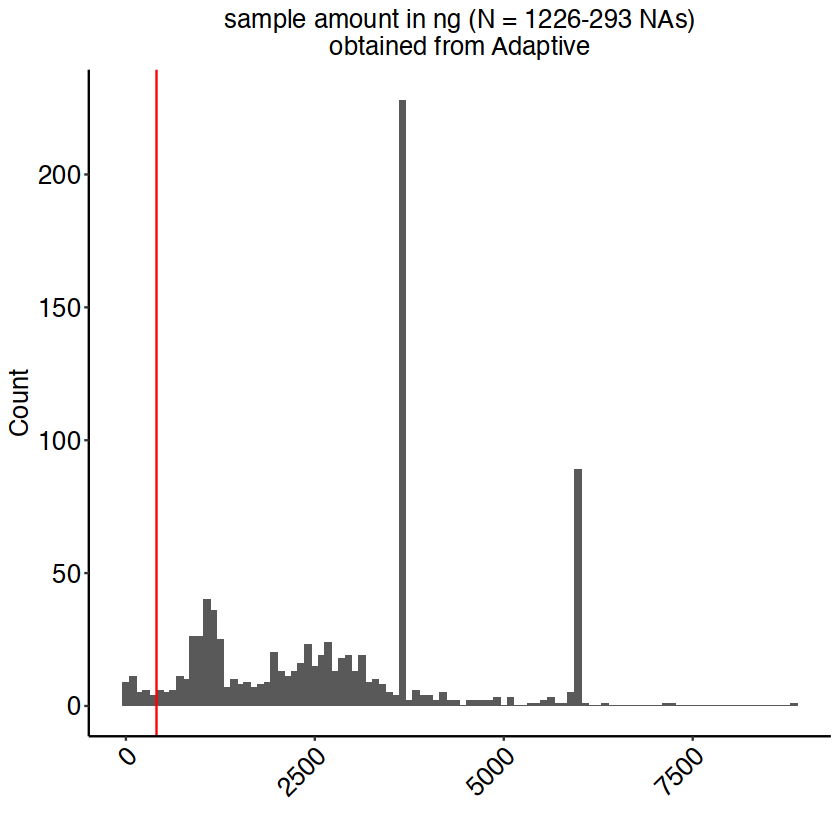

In [94]:
ggplot(Adaptive_clones_testname, aes(x = sample_amount_ng)) + geom_histogram(bins = 100) + myaxis + myplot +
labs(x = "", y = "Count", title = "sample amount in ng (N = 1226-293 NAs)\nobtained from Adaptive") + # All adaptive 
geom_vline(xintercept = 400, color = "red") 

In [95]:
dim(Adaptive_clones_testname)

[1] 1226    5

Remove 34 samples <= 400 ng input dna for adaptive

In [96]:
Adaptive_clones_testname <- Adaptive_clones_testname[ Adaptive_clones_testname$sample_amount_ng >= 400,]

In [97]:
dim(Adaptive_clones_testname)

[1] 1192    5

In [98]:
summary(Adaptive_clones_testname$productive_rearrangements)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
     75  112534  170379  181696  237655  591798     293 

In [135]:
quantile(Adaptive_clones_testname$productive_rearrangements, 0.05, na.rm = TRUE)

5% 
45804.2

In [128]:
591798/4000

[1] 147.9495

Warning message:
"Removed 293 rows containing non-finite values (`stat_bin()`)."


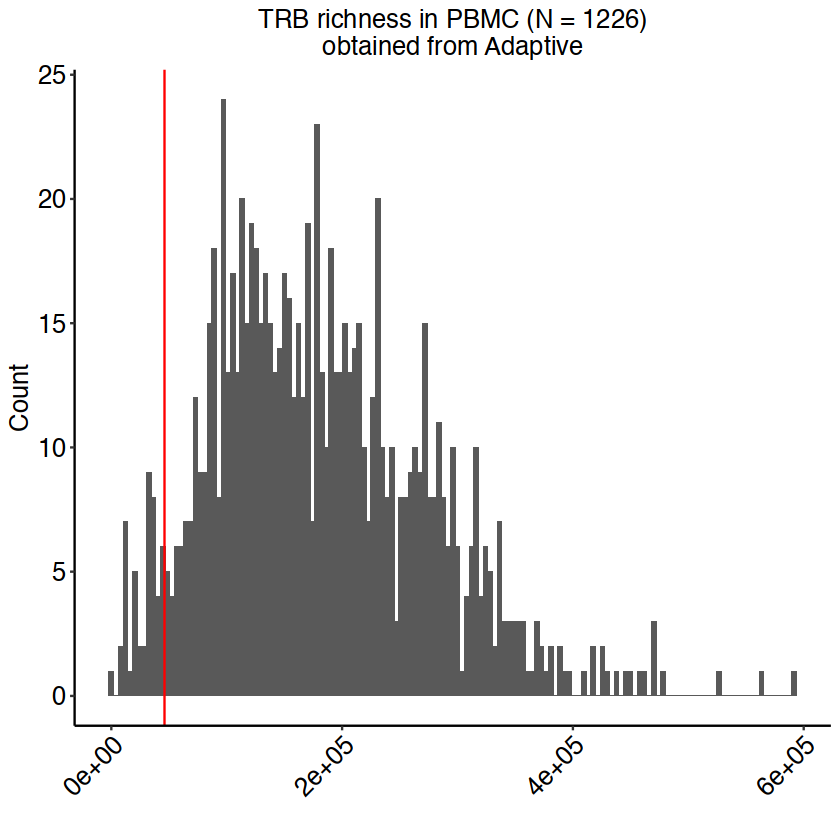

In [138]:
ggplot(Adaptive_clones_testname, aes(x = productive_rearrangements)) + geom_histogram(bins = 147) + myaxis + myplot +
labs(x = "", y = "Count", title = "TRB richness in PBMC (N = 1226)\nobtained from Adaptive")+  # All adaptive
geom_vline(xintercept = 45804.2, color = "red") 

Warning message:
"Removed 293 rows containing non-finite values (`stat_bin()`)."


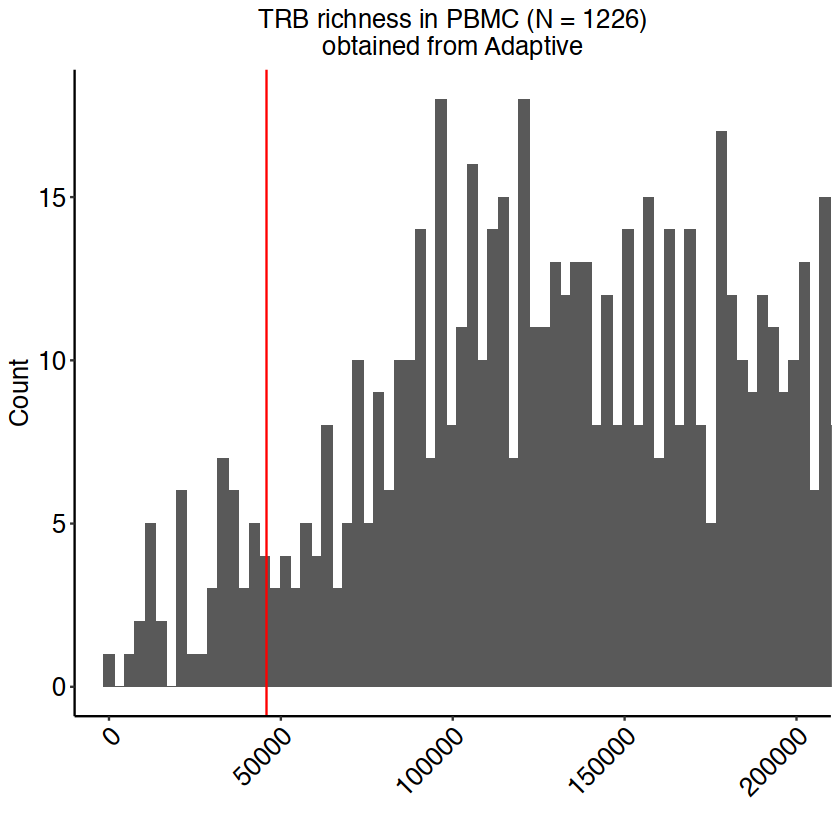

In [139]:
ggplot(Adaptive_clones_testname, aes(x = productive_rearrangements)) + geom_histogram(bins = 197) + myaxis + myplot +
labs(x = "", y = "Count", title = "TRB richness in PBMC (N = 1226)\nobtained from Adaptive") + # All adaptive 
coord_cartesian(xlim = c(0, 200000)) +
geom_vline(xintercept = 45804.2, color = "red")

Remove 45 samples <= 5% (45804.2) total productive cdr3 in adaptive

In [140]:
dim(Adaptive_clones_testname)

[1] 1192    5

In [141]:
Adaptive_clones_testname <- Adaptive_clones_testname[ Adaptive_clones_testname$productive_rearrangements >= 45805,]

In [142]:
dim(Adaptive_clones_testname)

[1] 1147    5

In [143]:
1192-1147

[1] 45

In [144]:
save(Adaptive_clones_testname, file = paste0(datapath, "Adaptivedatasets/Adaptive_clones_testname.RData"))